## Project 1
## Steven Ton

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Now add your own favorite song of all-time to the dataset (if it doesn’t already exist).


In [2]:
#Read dataset
df = pd.read_csv("dataset_31.csv")
music = pd.read_csv("dataset_31.csv")
#Add song to dataframes
music.loc[len(music.index)] = ['i wish you love, part 1', 'joe bataan', 1971.0, 'I wish you bluebirds in the spring To give your heart a song to sing And then a kiss, but more than this I wish you love And in July, a lemonade To cool you in aome leafy glade I wish you health But more than wealth I wish you love My breaking heart & I agree That you & I could never be So with my best My very best I set you free I wish you shelter from the storm A cozy fire to keep you warm But most of all when snowflakes fall I wish love So much love girl Mm, i wanna wish you love girl So much love']
#print the dataset with new song
print(music)
lyrics = music['lyrics']
lyrics = lyrics.dropna()
lyrics

                         song               artist    year  \
0                  group-girl              caravan  1971.0   
1                  nature-boy          grace-slick  1970.0   
2                         NaN          david-bowie  1974.0   
3                   lucky-man  emerson-lake-palmer  1970.0   
4               see-see-rider      everly-brothers  1973.0   
...                       ...                  ...     ...   
4496       power-of-the-blues             b-b-king  2006.0   
4497        my-elusive-dreams        bill-anderson  2007.0   
4498              shiny-teeth     discover-america  2007.0   
4499                afterglow        fates-warning  2007.0   
4500  i wish you love, part 1           joe bataan  1971.0   

                                                 lyrics  
0     There's a place where I can go, where I listen...  
1     There was a boy\nA very strange enchanted boy\...  
2     It's safe in the city, to love in a doorway\nT...  
3     He had white hors

0       There's a place where I can go, where I listen...
1       There was a boy\nA very strange enchanted boy\...
2       It's safe in the city, to love in a doorway\nT...
3       He had white horses\nAnd ladies by the score\n...
4       You see, see, rider, you see what you have don...
                              ...                        
4496    Get it while it`s hot.\nI`ve been all over Eur...
4497    You followed me to Texas you followed me to Ut...
4498    Let the mouth of hell bare its shiny teeth\nLe...
4499    Twilight and I lie awake\nAfterglow is all aro...
4500    I wish you bluebirds in the spring To give you...
Name: lyrics, Length: 4451, dtype: object

Now vectorize the texts by counts. Now we have converted text to numbers, so we can do computations.

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
#Sparse Matrix
vectorizer = CountVectorizer()
docterm = vectorizer.fit_transform(lyrics)
docterm

<4451x34069 sparse matrix of type '<class 'numpy.int64'>'
	with 392378 stored elements in Compressed Sparse Row format>

### (1) calculate the cosine similarity of every song to your favorite song. Find the top 5 songs with highest similarity to your favorite song.


In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
from sklearn.metrics.pairwise import cosine_similarity
#Cosine Similarity
counts = cosine_similarity(docterm)
similarity = counts[4450]
docterm
#drop all null values of lyrics to from music df to match the vectorized lyric series
musicdf = music.dropna(subset=['lyrics'])
#Add similarity column inorder to plot similarity of lyrics between all songs within the normalzied dataset 
musicdf['similarity'] = similarity
print(musicdf)

                         song               artist    year  \
0                  group-girl              caravan  1971.0   
1                  nature-boy          grace-slick  1970.0   
2                         NaN          david-bowie  1974.0   
3                   lucky-man  emerson-lake-palmer  1970.0   
4               see-see-rider      everly-brothers  1973.0   
...                       ...                  ...     ...   
4496       power-of-the-blues             b-b-king  2006.0   
4497        my-elusive-dreams        bill-anderson  2007.0   
4498              shiny-teeth     discover-america  2007.0   
4499                afterglow        fates-warning  2007.0   
4500  i wish you love, part 1           joe bataan  1971.0   

                                                 lyrics  similarity  
0     There's a place where I can go, where I listen...    0.197042  
1     There was a boy\nA very strange enchanted boy\...    0.271299  
2     It's safe in the city, to love in a doo

C:\Users\Steve\AppData\Local\Temp\ipykernel_10736\73812246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicdf['similarity'] = similarity


### (2) do the same thing but instead of vectorizing based on counts, have it vectorized using tfidf.

In [5]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
#Tf-idf matrix
tfidfVectorizer = TfidfVectorizer()
tfidfdocterm = tfidfVectorizer.fit_transform(lyrics)
tfidfCounts = cosine_similarity(tfidfdocterm)
tfidfSimilarity = tfidfCounts[4450]
musicdf['tfidfSimilarity'] = tfidfSimilarity
print(musicdf)

                         song               artist    year  \
0                  group-girl              caravan  1971.0   
1                  nature-boy          grace-slick  1970.0   
2                         NaN          david-bowie  1974.0   
3                   lucky-man  emerson-lake-palmer  1970.0   
4               see-see-rider      everly-brothers  1973.0   
...                       ...                  ...     ...   
4496       power-of-the-blues             b-b-king  2006.0   
4497        my-elusive-dreams        bill-anderson  2007.0   
4498              shiny-teeth     discover-america  2007.0   
4499                afterglow        fates-warning  2007.0   
4500  i wish you love, part 1           joe bataan  1971.0   

                                                 lyrics  similarity  \
0     There's a place where I can go, where I listen...    0.197042   
1     There was a boy\nA very strange enchanted boy\...    0.271299   
2     It's safe in the city, to love in a 

C:\Users\Steve\AppData\Local\Temp\ipykernel_10736\3845318240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musicdf['tfidfSimilarity'] = tfidfSimilarity


###  (3) use the results of section 2 (which was tfidf-based) to do this section: use seaborn’s relplot function to plot the cosine similarity of songs to your favorite song as a function of year (so the x axis is year, y axis is cosine similarity to your favorite song). Export it as pdf.

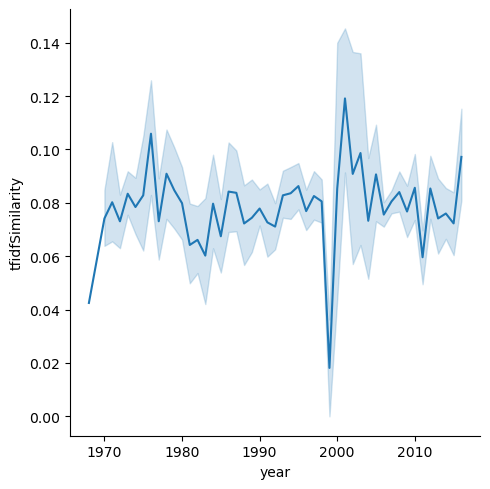

In [6]:
#Plot data with Seaborn
sns.relplot(data=musicdf, x='year', y='tfidfSimilarity', kind='line')